In [1]:

#import library
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import plotly.express as px
from wordcloud import WordCloud
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
!pip install scikit-learn #Install scikit-learn if not already installed
from sklearn import metrics # Import the 'metrics' module from scikit-learn
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import ComplementNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import warnings

In [2]:
# Assign the file path to a variable
file_path = '/content/spam.csv'

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv(file_path, encoding='latin1')

# Now you can call head() on the DataFrame
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.shape

(5572, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
# names of cols
print(df.columns)
#count
df['v1'].value_counts()

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')


,count
v1,
ham,4825
spam,747


In [6]:
# remove duplicate
df.drop_duplicates(inplace=True)
print(df.shape)

(5169, 5)


In [7]:
print(df.isnull().sum())

v1               0
v2               0
Unnamed: 2    5126
Unnamed: 3    5159
Unnamed: 4    5164
dtype: int64


In [8]:
# إزالة المسافات أو الفراغات في أسماء الأعمدة إذا وجدت
df.columns = df.columns.str.strip()

# المحاولة مرة أخرى لحذف الأعمدة
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)
print("Updated DataFrame columns:", df.columns.tolist())



Updated DataFrame columns: ['v1', 'v2']


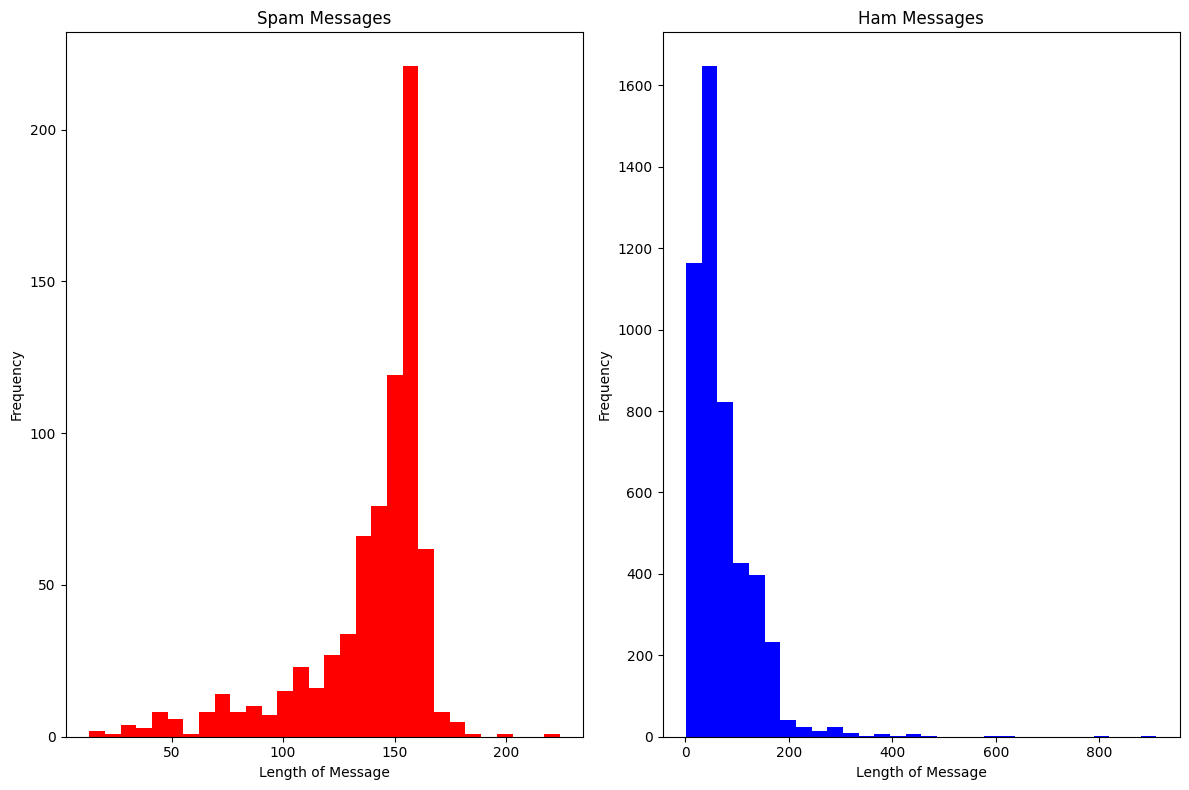

In [9]:
df = pd.read_csv(file_path, encoding='latin1')

# تصفية الرسائل المصنفة كـ 'Spam' و 'Ham'
spam_messages = df[df['v1'] == 'spam']['v2'].str.len()
ham_messages = df[df['v1'] == 'ham']['v2'].str.len()

# رسم الهيستوجرام لطول الرسائل المصنفة كـ Spam و Ham
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

# هيستوجرام للرسائل المصنفة كـ Spam
ax1.hist(spam_messages, bins=30, color='red')
ax1.set_title('Spam Messages')
ax1.set_xlabel('Length of Message')
ax1.set_ylabel('Frequency')

# هيستوجرام للرسائل المصنفة كـ Ham
ax2.hist(ham_messages, bins=30, color='blue')
ax2.set_title('Ham Messages')
ax2.set_xlabel('Length of Message')
ax2.set_ylabel('Frequency')

# عرض الرسم
plt.tight_layout()
plt.show()

In [10]:
# download the stopwords package
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [11]:
def process(text):
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)

    clean = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    return clean
# to show the tokenization
df['v2'].head().apply(process)

,v2
0,"[Go, jurong, point, crazy, Available, bugis, n..."
1,"[Ok, lar, Joking, wif, u, oni]"
2,"[Free, entry, 2, wkly, comp, win, FA, Cup, fin..."
3,"[U, dun, say, early, hor, U, c, already, say]"
4,"[Nah, dont, think, goes, usf, lives, around, t..."


In [12]:
# تحويل عمود 'v1' إلى قيم رقمية، ثم تحويلها إلى تسميات نصية مباشرة
df['spam'] = df['v1'].apply(lambda x: 'spam' if x == 'spam' else 'not spam')

# عرض DataFrame المحدث
display(df.head())

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4,spam
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,not spam
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN,not spam
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,spam
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN,not spam
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,not spam


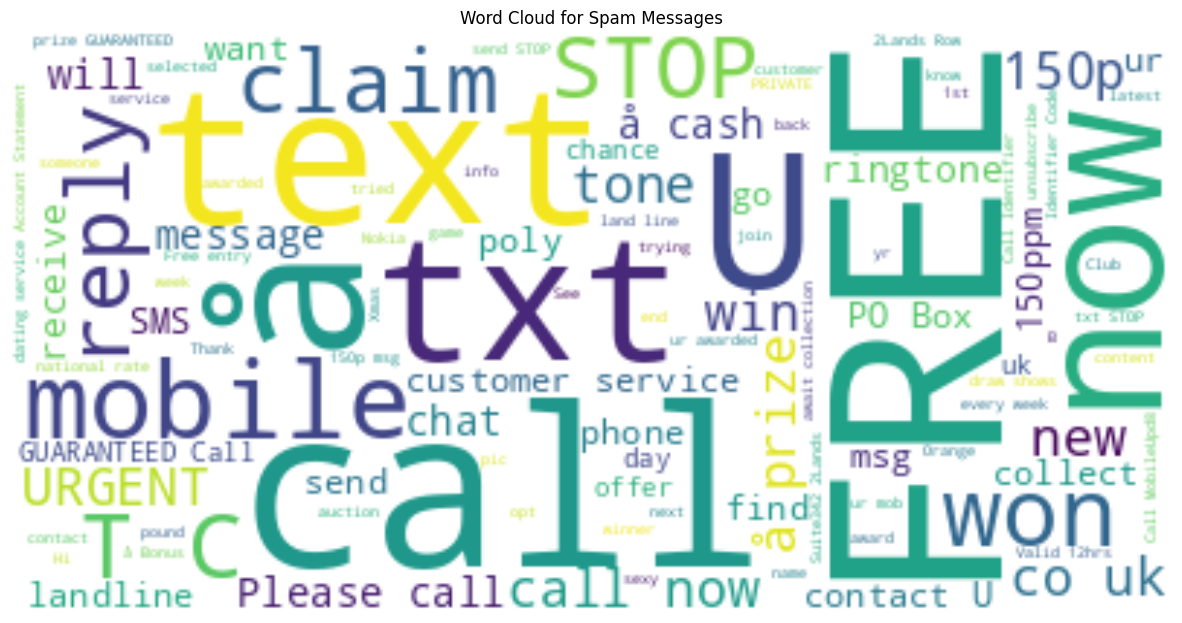

In [13]:
text = " ".join(i for i in df[df['v1'] == 'spam']['v2'])

# إنشاء word cloud
wordcloud = WordCloud(background_color="white").generate(text)

# عرض word cloud
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud for Spam Messages')
plt.show()

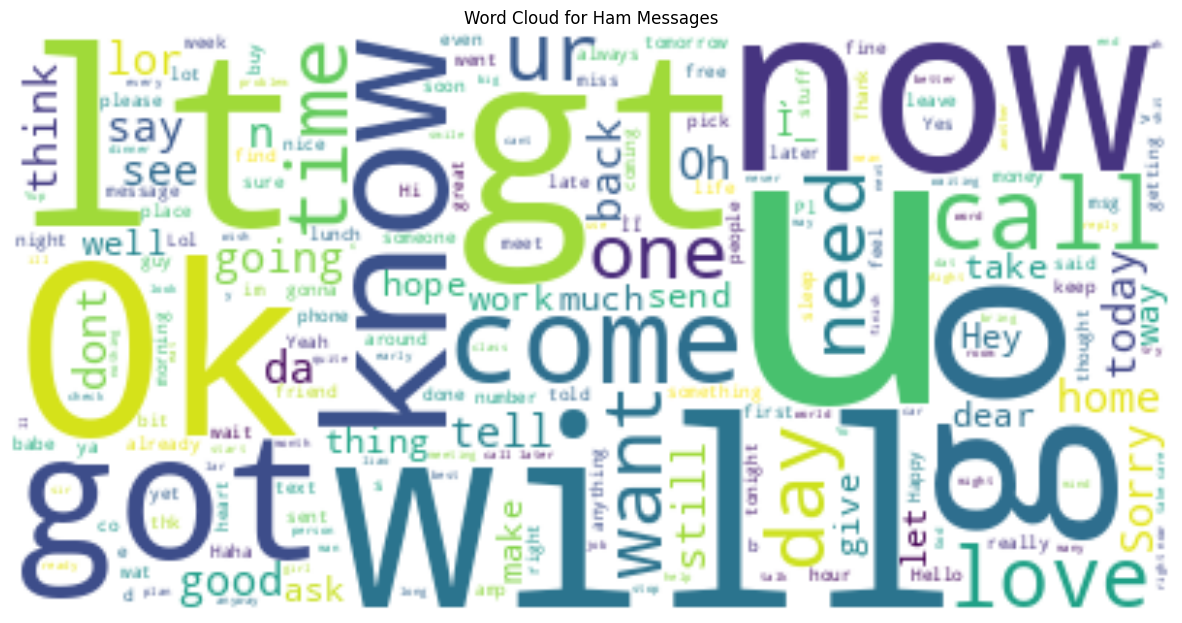

In [14]:
text = " ".join(i for i in df[df['v1'] == 'ham']['v2'])
# إنشاء word cloud
wordcloud = WordCloud(background_color="white").generate(text)

# عرض word cloud
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud for Ham Messages')
plt.show()

In [16]:
# تحميل كلمات التوقف (stopwords) الإنجليزية
stop_words = set(stopwords.words('english'))

def cleaning(text):
    # تحويل النص إلى أحرف صغيرة
    text = text.lower()
    # إزالة الروابط
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    # إزالة الأرقام
    text = re.sub(r"\b\d+\b", "", text)
    # إزالة الشخصيات الخاصة وعلامات الترقيم
    text = re.sub(r'[^\w\s]', '', text)
    # إزالة الرموز التعبيرية
    emoji_pattern = re.compile(
        "[" u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251" "]",
        flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)
    # إزالة كلمات التوقف
    text = " ".join([word for word in text.split() if word not in stop_words])
    return text

# تطبيق دالة التنظيف على عمود 'v2' (النصوص)
df['cleaned_text'] = df['v2'].apply(cleaning)

# إعادة تطبيق CountVectorizer بعد التنظيف
cv = CountVectorizer()
x = cv.fit_transform(df['cleaned_text']).toarray()


# تطبيق دالة التنظيف على عمود 'v2' (النصوص) وإنشاء عمود جديد للنصوص النظيفة
df['cleaned_text'] = df['v2'].apply(cleaning)

# عرض بعض النتائج الأصلية والنظيفة للتحقق
df[['v2', 'cleaned_text']].head(5)


,v2,cleaned_text
0,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts 21s...
3,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,"Nah I don't think he goes to usf, he lives aro...",nah dont think goes usf lives around though


In [17]:
cv = CountVectorizer(analyzer=process)
x = cv.fit_transform(df['v2']).toarray()
x
#Tf = TfidVectorizer(analyzer=process)
# x = Tf.fit_transform(df['text']).toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [18]:
xtrain, xtest, ytrain, ytest = train_test_split(x, df['spam'], test_size=0.20, random_state=0)
# To see the shape of the data
print(x.shape)

(5572, 11304)


In [19]:
# create and train the Naive Bayes Classifier
classifier = MultinomialNB().fit(xtrain, ytrain)

In [20]:
print(classifier.predict(xtrain))
print(ytrain.values)

['not spam' 'not spam' 'not spam' ... 'not spam' 'not spam' 'not spam']
['not spam' 'not spam' 'not spam' ... 'not spam' 'not spam' 'not spam']


In [21]:
pred = classifier.predict(xtrain)
print(classification_report(ytrain, pred))
print()
print("Confusion Matrix: \n", confusion_matrix(ytrain, pred))
print("Accuracy: \n", accuracy_score(ytrain, pred))

              precision    recall  f1-score   support

    not spam       1.00      1.00      1.00      3876
        spam       0.98      0.98      0.98       581

    accuracy                           0.99      4457
   macro avg       0.99      0.99      0.99      4457
weighted avg       0.99      0.99      0.99      4457


Confusion Matrix: 
 [[3864   12]
 [  12  569]]
Accuracy: 
 0.9946152120260264


In [22]:
#print the predictions
print(classifier.predict(xtest))
#print the actual values
print(ytest.values)

['not spam' 'not spam' 'not spam' ... 'not spam' 'not spam' 'not spam']
['not spam' 'not spam' 'not spam' ... 'not spam' 'not spam' 'not spam']


In [23]:
pred = classifier.predict(xtest)
print(classification_report(ytest, pred))
print()
print("Confusion Matrix: \n", confusion_matrix(ytest, pred))
print("Accuracy: \n", accuracy_score(ytest, pred))

              precision    recall  f1-score   support

    not spam       0.99      0.96      0.97       949
        spam       0.81      0.93      0.87       166

    accuracy                           0.96      1115
   macro avg       0.90      0.95      0.92      1115
weighted avg       0.96      0.96      0.96      1115


Confusion Matrix: 
 [[914  35]
 [ 12 154]]
Accuracy: 
 0.957847533632287


In [24]:
model = MultinomialNB()
model.fit(xtrain, ytrain)
predictions = model.predict(xtest)
predicted = model.predict(xtest)
# حساب دقة النموذج
accuracy_score = metrics.accuracy_score(predicted, ytest)
# طباعة نتائج التقييم
print('MultinomialNB model accuracy is', str('{:04.2f}'.format(accuracy_score * 100)) + '%')
print('------------------------------------------------')
print('Confusion Matrix:')
print(pd.DataFrame(confusion_matrix(ytest, predicted)))
print('------------------------------------------------')
print('Classification Report:')
print(classification_report(ytest, predicted))

MultinomialNB model accuracy is 95.78%
------------------------------------------------
Confusion Matrix:
     0    1
0  914   35
1   12  154
------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

    not spam       0.99      0.96      0.97       949
        spam       0.81      0.93      0.87       166

    accuracy                           0.96      1115
   macro avg       0.90      0.95      0.92      1115
weighted avg       0.96      0.96      0.96      1115



In [25]:
# تدريب نموذج BernoulliNB على البيانات التدريبية
bnb = BernoulliNB()
bnb.fit(xtrain, ytrain)

# التنبؤ باستخدام البيانات الاختبارية
predicted = bnb.predict(xtest)

# حساب دقة النموذج
accuracy_score_bnb = metrics.accuracy_score(ytest, predicted)

# طباعة نتائج التقييم
print('BernoulliNB model accuracy = {:.2f}%'.format(accuracy_score_bnb * 100))
print('------------------------------------------------')
print('Confusion Matrix:')
print(pd.DataFrame(confusion_matrix(ytest, predicted),
                   index=['Actual Ham', 'Actual Spam'],
                   columns=['Predicted Ham', 'Predicted Spam']))
print('------------------------------------------------')
print('Classification Report:')
print(classification_report(ytest, predicted))


BernoulliNB model accuracy = 95.78%
------------------------------------------------
Confusion Matrix:
             Predicted Ham  Predicted Spam
Actual Ham             940               9
Actual Spam             38             128
------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

    not spam       0.96      0.99      0.98       949
        spam       0.93      0.77      0.84       166

    accuracy                           0.96      1115
   macro avg       0.95      0.88      0.91      1115
weighted avg       0.96      0.96      0.96      1115



In [26]:
# تدريب نموذج ComplementNB على البيانات التدريبية
CNB = ComplementNB()
CNB.fit(xtrain, ytrain)

# التنبؤ باستخدام البيانات الاختبارية
predicted = CNB.predict(xtest)

# حساب دقة النموذج
accuracy_score = metrics.accuracy_score(predicted, ytest)

# طباعة نتائج التقييم
print('ComplementNB model accuracy is', str('{:04.2f}'.format(accuracy_score * 100)) + '%')
print('------------------------------------------------')
print('Confusion Matrix:')
print(pd.DataFrame(confusion_matrix(ytest, predicted)))
print('------------------------------------------------')
print('Classification Report:')
print(classification_report(ytest, predicted))

ComplementNB model accuracy is 92.83%
------------------------------------------------
Confusion Matrix:
     0    1
0  875   74
1    6  160
------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

    not spam       0.99      0.92      0.96       949
        spam       0.68      0.96      0.80       166

    accuracy                           0.93      1115
   macro avg       0.84      0.94      0.88      1115
weighted avg       0.95      0.93      0.93      1115



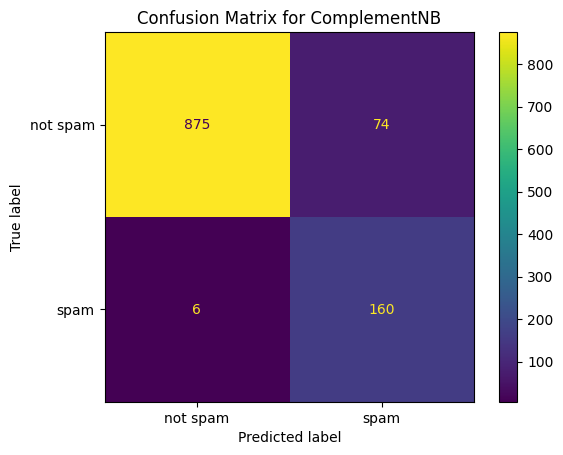

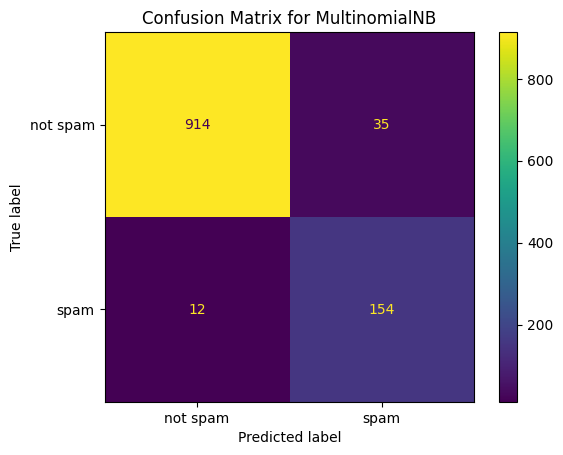

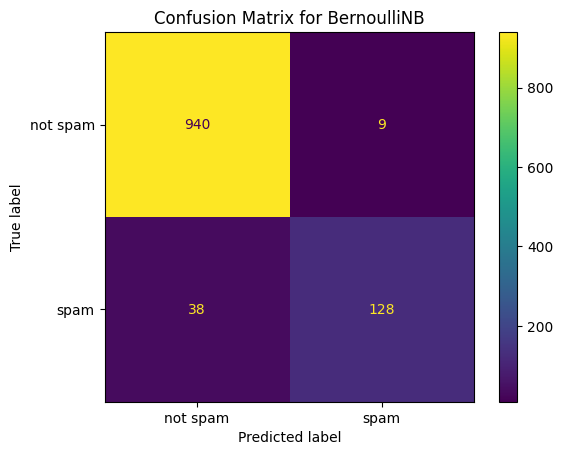

In [27]:
warnings.filterwarnings("ignore")
# قائمة النماذج
models = [CNB, model, bnb]
model_names = ['ComplementNB', 'MultinomialNB', 'BernoulliNB']

# حلقة لعرض مصفوفات الالتباس لكل نموذج
for model, name in zip(models, model_names):
    # حساب مصفوفة الالتباس
    cm = confusion_matrix(ytest, model.predict(xtest))

    # إنشاء كائن ConfusionMatrixDisplay
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

    # رسم مصفوفة الالتباس
    disp.plot()
    plt.title(f'Confusion Matrix for {name}')  # تحديد عنوان النموذج
    plt.show()


In [28]:
input = ['Free entry in 2 a wkly comp to win FA Cup fina.']
input_data = cv.transform(input)
prediction = classifier.predict(input_data)
if(prediction[0]==1):
    print("ham")
else:
    print('spam')

spam


In [29]:
# إعداد البيانات
spam_text = df[df['v1'] == 'spam']['cleaned_text']
ham_text = df[df['v1'] == 'ham']['cleaned_text']

# استخدام CountVectorizer للحصول على تكرار الكلمات لكل فئة
vectorizer_spam = CountVectorizer(max_features=10)
vectorizer_ham = CountVectorizer(max_features=10)

# تحويل نصوص spam إلى مصفوفة تكرار
spam_counts = vectorizer_spam.fit_transform(spam_text)
spam_features = vectorizer_spam.get_feature_names_out()
spam_word_counts = spam_counts.sum(axis=0).A1

# تحويل نصوص ham إلى مصفوفة تكرار
ham_counts = vectorizer_ham.fit_transform(ham_text)
ham_features = vectorizer_ham.get_feature_names_out()
ham_word_counts = ham_counts.sum(axis=0).A1

# عرض النتائج في DataFrame للـ top 10
spam_top10_df = pd.DataFrame({'Word': spam_features, 'Frequency': spam_word_counts}).sort_values(by='Frequency', ascending=False)
ham_top10_df = pd.DataFrame({'Word': ham_features, 'Frequency': ham_word_counts}).sort_values(by='Frequency', ascending=False)

print("Top 10 Words for Spam Messages:")
print(spam_top10_df)

print("\nTop 10 Words for Ham Messages:")
print(ham_top10_df)


Top 10 Words for Spam Messages:
     Word  Frequency
0    call        347
2    free        217
8     txt        150
9      ur        144
3  mobile        123
7    text        120
1   claim        113
6    stop        113
5   reply        101
4   prize         92

Top 10 Words for Ham Messages:
   Word  Frequency
5    im        450
1   get        303
7  ltgt        276
8    ok        272
0  dont        257
2    go        247
9    ur        240
4   ill        236
6  know        232
3   got        231
